## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.385868  0.937714 -1.314193  0.276340 -0.756279  0.723347
1  1.134509 -1.063873  1.140773  1.098301  1.393892  0.956073
2 -1.551741  1.399094 -0.743154  1.630441  0.093659  0.172259
3 -0.822632  1.035466  1.333446 -0.074654  1.366045  0.718000
4  1.124047 -1.062566 -0.907927  0.086044 -1.085885 -0.335665


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0085060	total: 68.5ms	remaining: 1m 8s
1:	learn: 0.9973343	total: 69.2ms	remaining: 34.5s
2:	learn: 0.9862425	total: 69.7ms	remaining: 23.2s
3:	learn: 0.9752169	total: 70.2ms	remaining: 17.5s
4:	learn: 0.9652234	total: 70.7ms	remaining: 14.1s
5:	learn: 0.9549010	total: 71.4ms	remaining: 11.8s
6:	learn: 0.9432911	total: 71.8ms	remaining: 10.2s
7:	learn: 0.9335272	total: 72.3ms	remaining: 8.97s
8:	learn: 0.9245954	total: 72.8ms	remaining: 8.02s
9:	learn: 0.9154220	total: 73.3ms	remaining: 7.26s
10:	learn: 0.9053754	total: 73.7ms	remaining: 6.63s
11:	learn: 0.8954632	total: 74.2ms	remaining: 6.11s
12:	learn: 0.8853125	total: 74.7ms	remaining: 5.67s
13:	learn: 0.8763823	total: 75.2ms	remaining: 5.29s
14:	learn: 0.8691725	total: 75.6ms	remaining: 4.96s
15:	learn: 0.8613556	total: 76ms	remaining: 4.68s
16:	learn: 0.8523446	total: 76.6ms	remaining: 4.43s
17:	learn: 0.8430289	total: 77ms	remaining: 4.2s
18:	learn: 0.8336866	total: 77.4ms	remaining: 4s


87:	learn: 0.4340577	total: 109ms	remaining: 1.13s
88:	learn: 0.4299922	total: 110ms	remaining: 1.12s
89:	learn: 0.4262304	total: 110ms	remaining: 1.11s
90:	learn: 0.4229478	total: 111ms	remaining: 1.11s
91:	learn: 0.4192996	total: 111ms	remaining: 1.1s
92:	learn: 0.4156126	total: 112ms	remaining: 1.09s
93:	learn: 0.4125932	total: 112ms	remaining: 1.08s
94:	learn: 0.4092735	total: 113ms	remaining: 1.07s
95:	learn: 0.4057993	total: 113ms	remaining: 1.06s
96:	learn: 0.4022906	total: 114ms	remaining: 1.06s
97:	learn: 0.3993907	total: 114ms	remaining: 1.05s
98:	learn: 0.3957547	total: 115ms	remaining: 1.04s
99:	learn: 0.3923863	total: 115ms	remaining: 1.03s
100:	learn: 0.3898496	total: 115ms	remaining: 1.03s
101:	learn: 0.3863255	total: 116ms	remaining: 1.02s
102:	learn: 0.3835525	total: 116ms	remaining: 1.01s
103:	learn: 0.3811520	total: 117ms	remaining: 1.01s
104:	learn: 0.3778530	total: 118ms	remaining: 1s
105:	learn: 0.3746711	total: 118ms	remaining: 995ms
106:	learn: 0.3717124	total: 

257:	learn: 0.1291787	total: 187ms	remaining: 538ms
258:	learn: 0.1284254	total: 188ms	remaining: 536ms
259:	learn: 0.1274044	total: 188ms	remaining: 535ms
260:	learn: 0.1264738	total: 188ms	remaining: 533ms
261:	learn: 0.1257906	total: 189ms	remaining: 532ms
262:	learn: 0.1249529	total: 189ms	remaining: 530ms
263:	learn: 0.1240094	total: 190ms	remaining: 528ms
264:	learn: 0.1234479	total: 190ms	remaining: 527ms
265:	learn: 0.1226794	total: 191ms	remaining: 526ms
266:	learn: 0.1220238	total: 191ms	remaining: 525ms
267:	learn: 0.1211999	total: 192ms	remaining: 523ms
268:	learn: 0.1203724	total: 192ms	remaining: 522ms
269:	learn: 0.1197058	total: 193ms	remaining: 521ms
270:	learn: 0.1189848	total: 193ms	remaining: 520ms
271:	learn: 0.1182864	total: 194ms	remaining: 519ms
272:	learn: 0.1174456	total: 194ms	remaining: 517ms
273:	learn: 0.1165870	total: 195ms	remaining: 516ms
274:	learn: 0.1158759	total: 195ms	remaining: 515ms
275:	learn: 0.1150485	total: 196ms	remaining: 514ms
276:	learn: 

479:	learn: 0.0463479	total: 292ms	remaining: 317ms
480:	learn: 0.0462893	total: 293ms	remaining: 316ms
481:	learn: 0.0462318	total: 293ms	remaining: 315ms
482:	learn: 0.0461751	total: 294ms	remaining: 314ms
483:	learn: 0.0460125	total: 294ms	remaining: 314ms
484:	learn: 0.0459573	total: 295ms	remaining: 313ms
485:	learn: 0.0458854	total: 295ms	remaining: 312ms
486:	learn: 0.0457154	total: 296ms	remaining: 311ms
487:	learn: 0.0455203	total: 296ms	remaining: 311ms
488:	learn: 0.0453542	total: 297ms	remaining: 310ms
489:	learn: 0.0451128	total: 297ms	remaining: 309ms
490:	learn: 0.0449502	total: 297ms	remaining: 308ms
491:	learn: 0.0447670	total: 298ms	remaining: 307ms
492:	learn: 0.0446144	total: 298ms	remaining: 307ms
493:	learn: 0.0444963	total: 299ms	remaining: 306ms
494:	learn: 0.0443481	total: 299ms	remaining: 305ms
495:	learn: 0.0442322	total: 300ms	remaining: 304ms
496:	learn: 0.0441180	total: 300ms	remaining: 304ms
497:	learn: 0.0440668	total: 301ms	remaining: 303ms
498:	learn: 

638:	learn: 0.0249298	total: 371ms	remaining: 209ms
639:	learn: 0.0248364	total: 371ms	remaining: 209ms
640:	learn: 0.0247002	total: 372ms	remaining: 208ms
641:	learn: 0.0245521	total: 372ms	remaining: 208ms
642:	learn: 0.0245023	total: 374ms	remaining: 207ms
643:	learn: 0.0243934	total: 374ms	remaining: 207ms
644:	learn: 0.0243175	total: 375ms	remaining: 206ms
645:	learn: 0.0241731	total: 375ms	remaining: 206ms
646:	learn: 0.0240448	total: 376ms	remaining: 205ms
647:	learn: 0.0239004	total: 376ms	remaining: 204ms
648:	learn: 0.0237951	total: 377ms	remaining: 204ms
649:	learn: 0.0237513	total: 377ms	remaining: 203ms
650:	learn: 0.0237146	total: 377ms	remaining: 202ms
651:	learn: 0.0236422	total: 378ms	remaining: 202ms
652:	learn: 0.0235304	total: 378ms	remaining: 201ms
653:	learn: 0.0234656	total: 379ms	remaining: 200ms
654:	learn: 0.0234195	total: 379ms	remaining: 200ms
655:	learn: 0.0233159	total: 379ms	remaining: 199ms
656:	learn: 0.0231779	total: 380ms	remaining: 198ms
657:	learn: 

854:	learn: 0.0107427	total: 476ms	remaining: 80.7ms
855:	learn: 0.0107029	total: 476ms	remaining: 80.1ms
856:	learn: 0.0106754	total: 476ms	remaining: 79.5ms
857:	learn: 0.0106324	total: 478ms	remaining: 79.1ms
858:	learn: 0.0106026	total: 478ms	remaining: 78.5ms
859:	learn: 0.0105605	total: 479ms	remaining: 78ms
860:	learn: 0.0105132	total: 479ms	remaining: 77.4ms
861:	learn: 0.0104705	total: 480ms	remaining: 76.8ms
862:	learn: 0.0104329	total: 480ms	remaining: 76.2ms
863:	learn: 0.0104041	total: 481ms	remaining: 75.7ms
864:	learn: 0.0103630	total: 481ms	remaining: 75.1ms
865:	learn: 0.0103215	total: 482ms	remaining: 74.5ms
866:	learn: 0.0102714	total: 482ms	remaining: 74ms
867:	learn: 0.0102438	total: 483ms	remaining: 73.4ms
868:	learn: 0.0102060	total: 483ms	remaining: 72.8ms
869:	learn: 0.0101791	total: 484ms	remaining: 72.3ms
870:	learn: 0.0101333	total: 484ms	remaining: 71.7ms
871:	learn: 0.0100938	total: 485ms	remaining: 71.1ms
872:	learn: 0.0100662	total: 485ms	remaining: 70.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

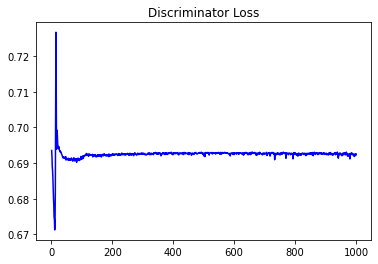

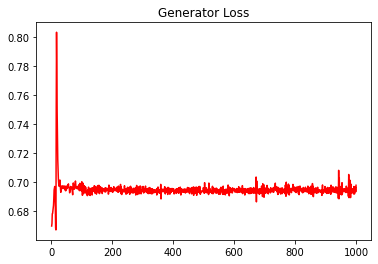

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05966623299747553


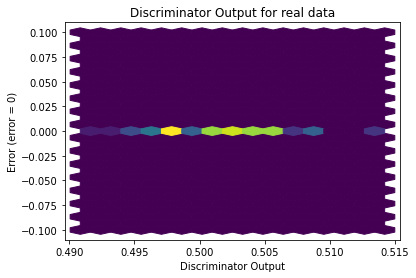

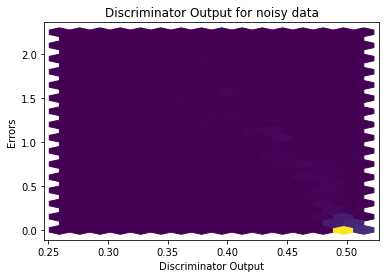

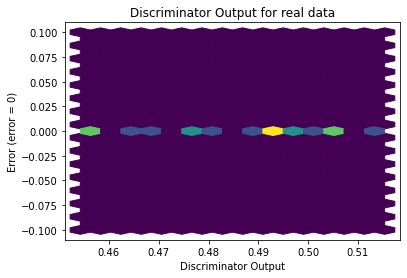

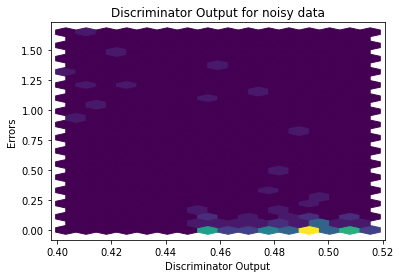

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


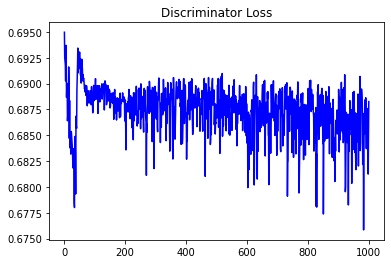

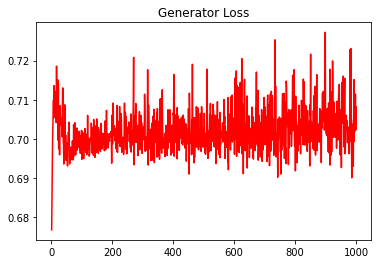

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.024159158489410092


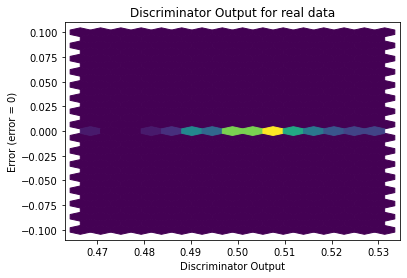

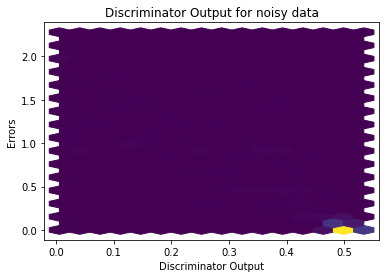

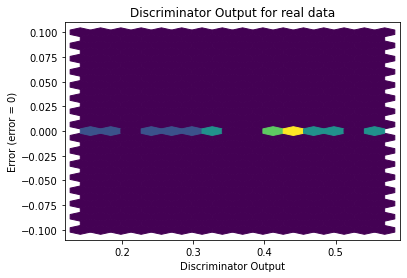

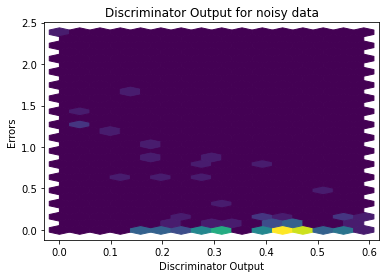

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1716]], requires_grad=True)
